## Confident and Correct/Incorrect Events and their Composites 

U/GPH ... not from PCs on relevant dates for the 90th percentile predictions from the EOF LSTM Model. 

File created 8/26/2025

In [1]:
#import cell first
%matplotlib inline
import numpy as np
import pandas as pd
import math
from random import seed
from random import randint
from random import sample
import xarray as xr

import pickle

##plotting related imports
import matplotlib.pyplot as plt

In [2]:
shift = 14

In [3]:
#bring in GPH and U-wind data. 
infile = open("../data/1959u.p","rb")
u_input = pickle.load(infile)  ##vertical U cross section
U_14 = u_input[52:62, 19+shift:168, :, :].reshape((10, 135, 37, 36))
infile.close()

infile = open("../data/gph/1959composite_capGPH100.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPH_14= gph_input[52:62, 19+shift:168, :, :].reshape((10, 135, 16, 180)) 
infile.close()

infile = open("../data/gph/1959anom_capGPH100.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPH_14A = gph_input[52:62, 19+shift:168, :, :].reshape((10, 135, 16, 180))
infile.close()

infile = open("../../REAL/eof_data/vertanom_ehf.p","rb",)
ehf_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
EHF_14 = ehf_input[52:62, 19+shift:168, :, :].reshape((10, 135, 37, 180))
infile.close()

print("U Wind shape: ",U_14.shape)
print("GPH shape: ",GPH_14.shape)

##set lat and lon arrays
##separate set of longitudes for PV and others
lat = np.arange(90, 18, -2)
print("Len latitudes: ", len(lat))
lon = np.arange(0, 362, 2)
print("Len longitudes: ", len(lon))

lev = np.array([1., 2., 3., 5., 7., 10., 20., 30., 50., 70., 100., 125., 150., 175., 200., 225., 250., 300., 350., 400., 
                450., 500., 550., 600., 650., 700., 750., 775., 800., 825., 850., 875., 900., 925., 950., 975., 1000.])
print("Len levels: ", len(lev))

U Wind shape:  (10, 135, 37, 36)
GPH shape:  (10, 135, 16, 180)
Len latitudes:  36
Len longitudes:  181
Len levels:  37


In [4]:
##open indice files
infile = open("posXtest_eur14_eof.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("FposXtest_eur14_eof.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("negXtest_eur14_eof.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("FnegXtest_eur14_eof.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

In [5]:
####now I wanna make these plots SO ... I am adding an index column on to X_test ... full version. 
ranges = np.array([x for x in range(0,135*10,1)])
ranges = ranges.reshape(10,135) 
ranges.shape

(10, 135)

Now ... I am going to have to designate the  events of interest. 

I will have to search and etablish when it is the greatest, save the indices, and plot composites. 

In [6]:
##Correct Positive Events
U_cpos = []
GPH_cpos = []
GPHA_cpos = []
EHF_cpos = []
pos_corr_total_events = []
posXtest_set = set(posXtest)


for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        if date_index not in posXtest_set:
            continue
        elif date_index in posXtest_set:
            U_cpos.extend(U_14[i,j,:,:])
            GPH_cpos.extend(GPH_14[i,j,:,:])
            GPHA_cpos.extend(GPH_14A[i,j,:,:])
            EHF_cpos.extend(EHF_14[i,j,:,:])
            pos_corr_total_events.append(0)
                            
##reshape
U_cpos = np.array(U_cpos).reshape(len(pos_corr_total_events),37,36)
GPH_cpos = np.array(GPH_cpos).reshape(len(pos_corr_total_events),16,180)
GPHA_cpos = np.array(GPHA_cpos).reshape(len(pos_corr_total_events),16,180)
EHF_cpos = np.array(EHF_cpos).reshape(len(pos_corr_total_events),37, 180)

print(U_cpos.shape)

##False Positive Events
U_Fpos = []
GPH_Fpos = []
GPHA_Fpos = []
EHF_Fpos = []
Fpos_corr_total_events = []
FposXtest_set = set(FposXtest)


for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        if date_index not in FposXtest_set:
            continue
        elif date_index in FposXtest_set:
            U_Fpos.extend(U_14[i,j,:,:])
            GPH_Fpos.extend(GPH_14[i,j,:,:])
            GPHA_Fpos.extend(GPH_14A[i,j,:,:])
            EHF_Fpos.extend(EHF_14[i,j,:,:])
            Fpos_corr_total_events.append(0)
                            
##reshape
U_Fpos = np.array(U_Fpos).reshape(len(Fpos_corr_total_events),37,36)
EHF_Fpos = np.array(EHF_Fpos).reshape(len(Fpos_corr_total_events),37, 180)
GPH_Fpos = np.array(GPH_Fpos).reshape(len(Fpos_corr_total_events),16,180)
GPHA_Fpos = np.array(GPHA_Fpos).reshape(len(Fpos_corr_total_events),16,180)

(143, 37, 36)


In [7]:
##Correct Negative Events
U_cneg = []
GPH_cneg = []
GPHA_cneg = []
EHF_cneg = []
neg_corr_total_events = []
negXtest_set = set(negXtest)


for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        if date_index not in negXtest_set:
            continue
        elif date_index in negXtest_set:
            U_cneg.extend(U_14[i,j,:,:])
            GPH_cneg.extend(GPH_14[i,j,:,:])
            GPHA_cneg.extend(GPH_14A[i,j,:,:])
            EHF_cneg.extend(EHF_14[i,j,:,:])
            neg_corr_total_events.append(0)
                            
##reshape
U_cneg = np.array(U_cneg).reshape(len(neg_corr_total_events),37,36)
EHF_cneg = np.array(EHF_cneg).reshape(len(neg_corr_total_events),37, 180)
GPH_cneg = np.array(GPH_cneg).reshape(len(neg_corr_total_events),16,180)             
GPHA_cneg = np.array(GPHA_cneg).reshape(len(neg_corr_total_events),16,180)             

##False Negative Events
U_Fneg = []
GPH_Fneg = []
GPHA_Fneg = []
EHF_Fneg = []
Fneg_corr_total_events = []
FnegXtest_set = set(FnegXtest)


for i in range(0,10):
    for j in range(0,135):
        #index for the date being observed
        date_index = ranges[i,j]
        ##loop through indexes of positive and correct events
        if date_index not in FnegXtest_set:
            continue
        elif date_index in FnegXtest_set:
            U_Fneg.extend(U_14[i,j,:,:])
            GPH_Fneg.extend(GPH_14[i,j,:,:])
            GPHA_Fneg.extend(GPH_14A[i,j,:,:])
            EHF_Fneg.extend(EHF_14[i,j,:,:])
            Fneg_corr_total_events.append(0)
                            
##reshape
U_Fneg = np.array(U_Fneg).reshape(len(Fneg_corr_total_events),37,36)
EHF_Fneg = np.array(EHF_Fneg).reshape(len(Fneg_corr_total_events),37, 180)
GPH_Fneg = np.array(GPH_Fneg).reshape(len(Fneg_corr_total_events),16,180)
GPHA_Fneg = np.array(GPHA_Fneg).reshape(len(Fneg_corr_total_events),16,180)

### Now that I have the arrays for the composites, plot them.

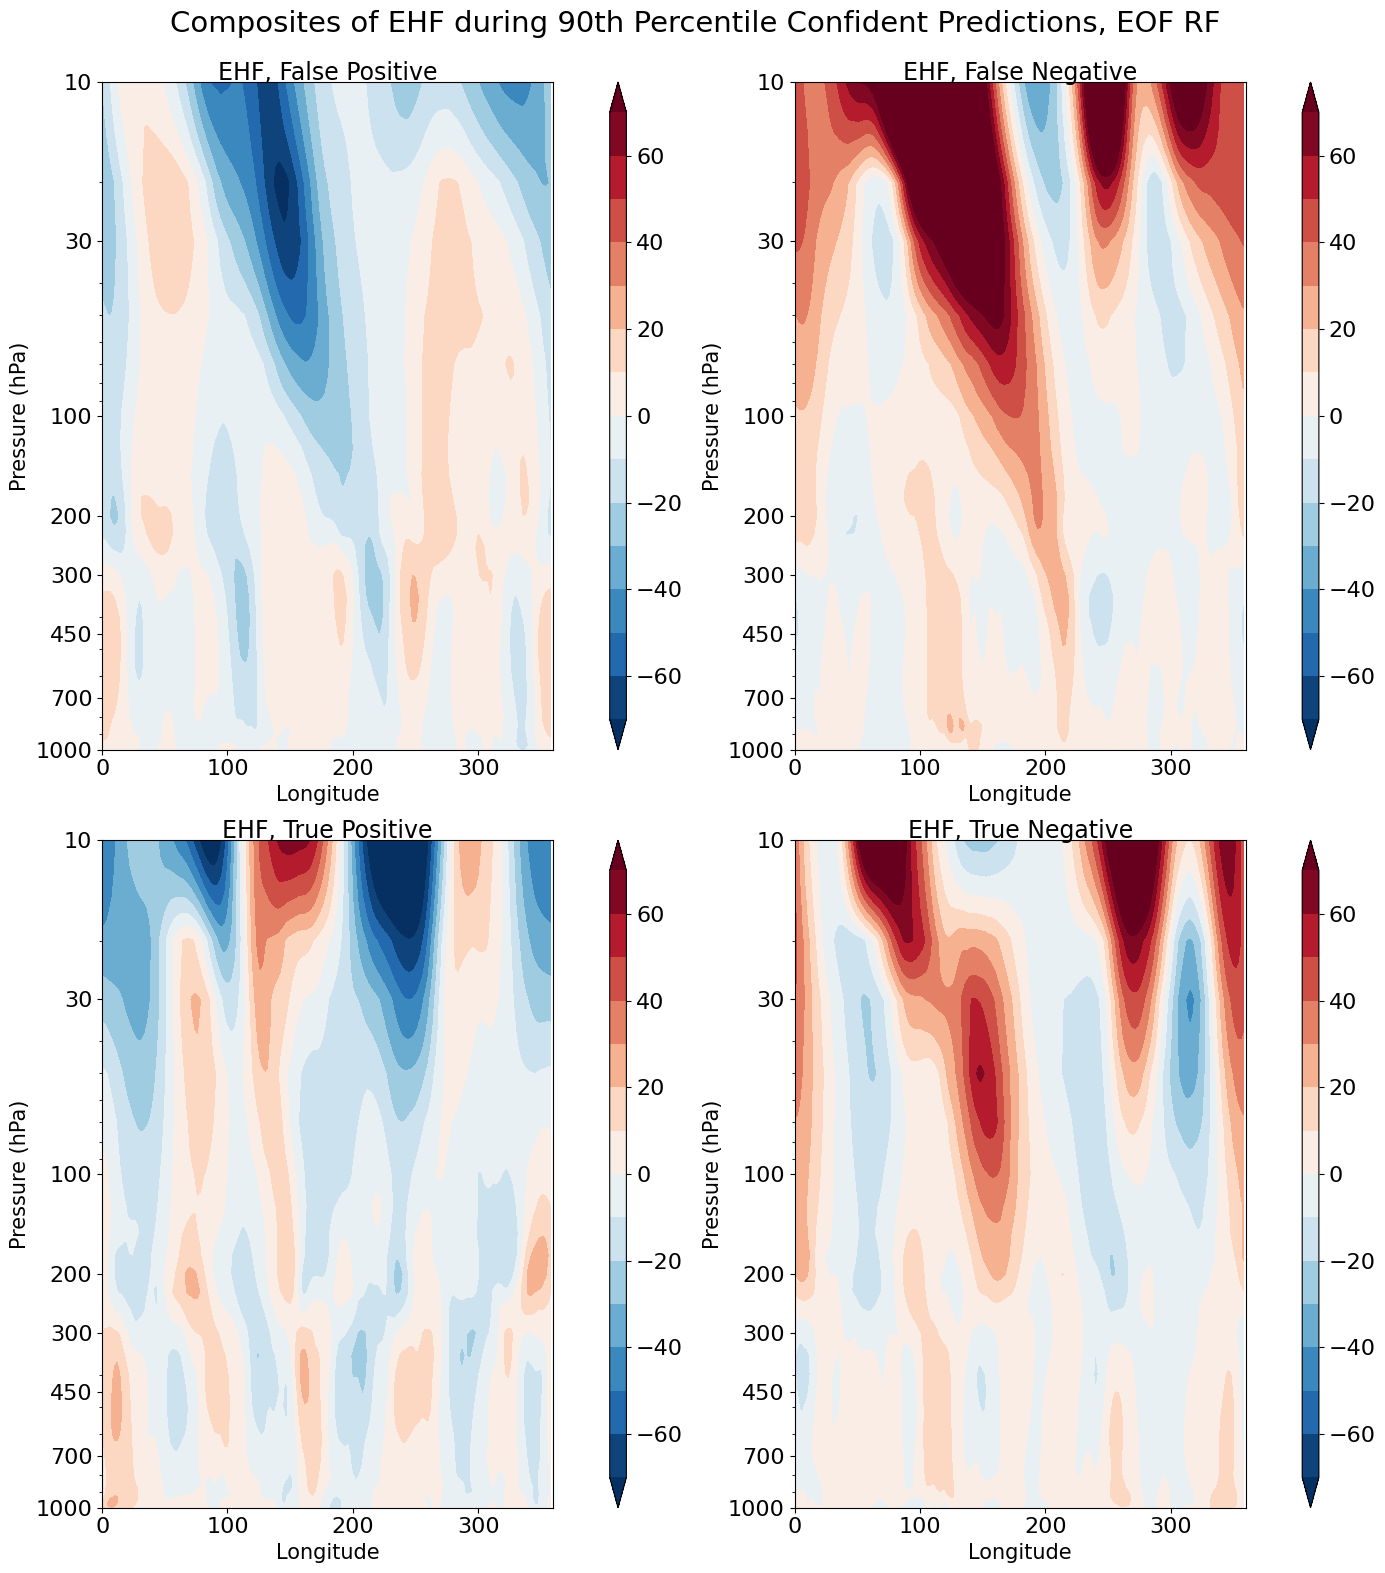

In [8]:
fs = 18
fig, axes = plt.subplots(2, 2, figsize=(14, 16))
plt.suptitle("Composites of EHF during 90th Percentile Confident Predictions, EOF RF",fontsize=21)   

titles = ["True Positive", "True Negative", "False Positive", "False Negative",]
data = [EHF_cpos[:,5:],EHF_cneg[:,5:],
        EHF_Fpos[:,5:],EHF_Fneg[:,5:]]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    
    colorbarMin = -70
    colorbarMax = 70
    colorspace = 10

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title("EHF, "+str(titles[i-2]), fontsize=fs-1, y=0.99) 

    h = axes[i].contourf(
        lon[:180],
        lev[5:],
        np.nanmean(data[i], axis = 0),
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    axes[i].tick_params(labelsize=fs-2)
    axes[i].set_yscale('log')
    axes[i].invert_yaxis()
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
    axes[i].set_yticks([10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(0, 360)
    axes[i].set_xlabel('Longitude', fontsize=fs-3)

    
plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("EOFRF_EHFComp.png",bbox_inches = 'tight')
plt.show()

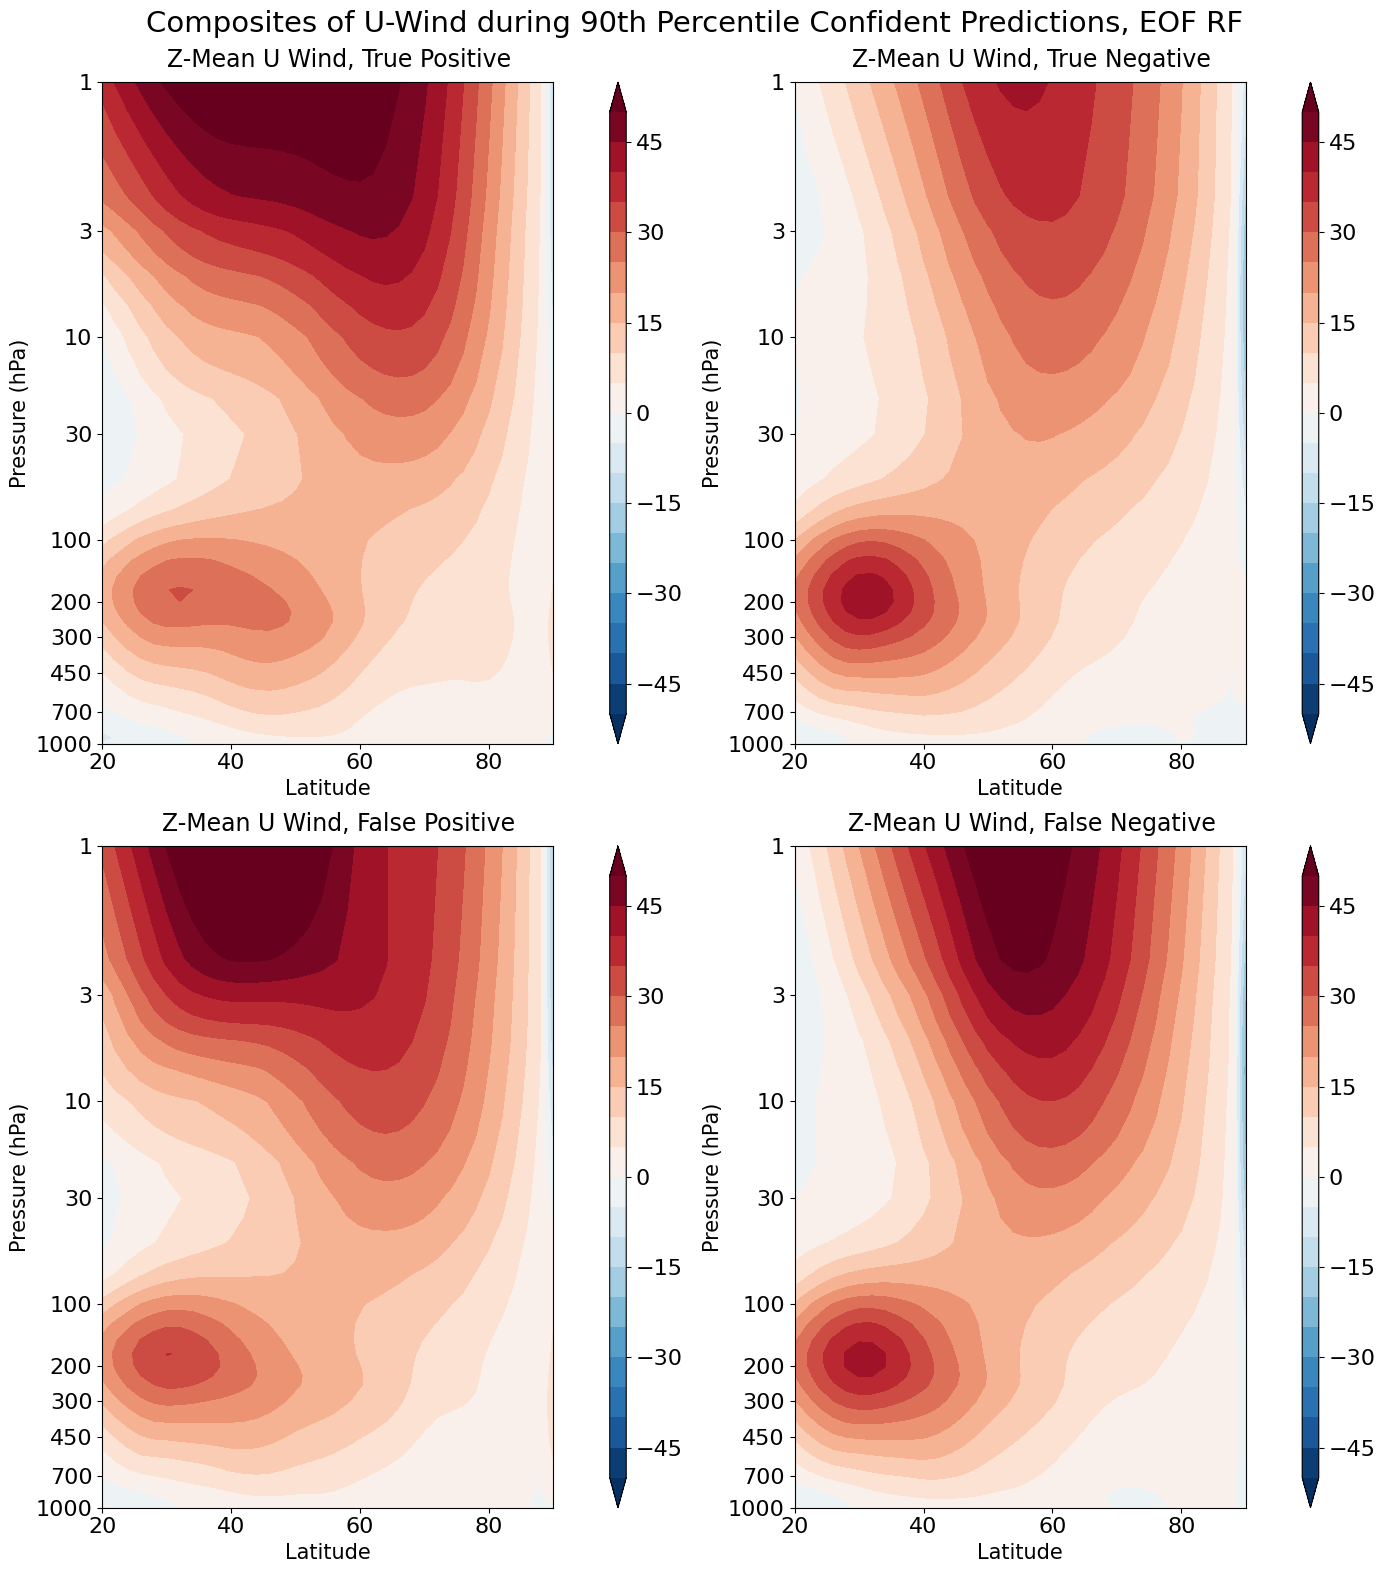

In [9]:
fs = 18
fig, axes = plt.subplots(2, 2, figsize=(14, 16))
plt.suptitle("Composites of U-Wind during 90th Percentile Confident Predictions, EOF RF",fontsize=21)   

titles = ["True Positive", "True Negative", "False Positive", "False Negative",]
data = [U_cpos,U_cneg,
        U_Fpos,U_Fneg]

axes = axes.flatten()
#remove the last (empty) axis

for i in range(0, 4):
    color = "RdBu_r"
    # colorbar options:
    
    colorbarMin = -50
    colorbarMax = 50
    colorspace = 5

    clevel = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)
    axes[i].set_title("Z-Mean U Wind, "+str(titles[i]), fontsize=fs-1, y=1.01,x=0.525)

    h = axes[i].contourf(
        lat,
        lev,
        np.nanmean(data[i], axis = 0),
        clevel,
        cmap=color,
        extend="both",
    )
    cbar = plt.colorbar(
        h, orientation="vertical", shrink=1, fraction=0.1, pad=0.1, aspect=40
    )
    cbar.ax.tick_params(labelsize=fs-2)
    # colorLabel='Z (m)'
    # cbar.set_label(label=colorLabel,fontsize=10)

    axes[i].tick_params(labelsize=fs-2)
    axes[i].invert_yaxis()
    axes[i].set_yscale('symlog')
    axes[i].set_ylabel('Pressure (hPa)', fontsize=fs-3)
    axes[i].set_yticks([1, 3, 10, 30, 100, 200, 300, 450, 700, 1000]) 
    axes[i].get_yaxis().set_major_formatter(plt.ScalarFormatter()) 

    axes[i].set_xlim(20, 90)
    axes[i].set_xlabel('Latitude', fontsize=fs-3)

    
plt.tight_layout()
plt.subplots_adjust(top=0.935)
plt.savefig("EOFRF_UwindComp.png",bbox_inches = 'tight')
plt.show()

In [10]:
#extrapolate to prevent missing data. 
gph_test = GPH_cpos[..., 0:1] 
gph_test.shape
GPH_cpos = np.concatenate([GPH_cpos, gph_test], axis=-1)

gph_test = GPH_Fpos[..., 0:1] 
gph_test.shape
GPH_Fpos = np.concatenate([GPH_Fpos, gph_test], axis=-1)

gph_test = GPH_cneg[..., 0:1] 
gph_test.shape
GPH_cneg = np.concatenate([GPH_cneg, gph_test], axis=-1)

gph_test = GPH_Fneg[..., 0:1] 
gph_test.shape
GPH_Fneg = np.concatenate([GPH_Fneg, gph_test], axis=-1)

gph_test = GPHA_cpos[..., 0:1] 
gph_test.shape
GPHA_cpos = np.concatenate([GPHA_cpos, gph_test], axis=-1)

gph_test = GPHA_Fpos[..., 0:1] 
gph_test.shape
GPHA_Fpos = np.concatenate([GPHA_Fpos, gph_test], axis=-1)

gph_test = GPHA_cneg[..., 0:1] 
gph_test.shape
GPHA_cneg = np.concatenate([GPHA_cneg, gph_test], axis=-1)

gph_test = GPHA_Fneg[..., 0:1] 
gph_test.shape
GPHA_Fneg = np.concatenate([GPHA_Fneg, gph_test], axis=-1)

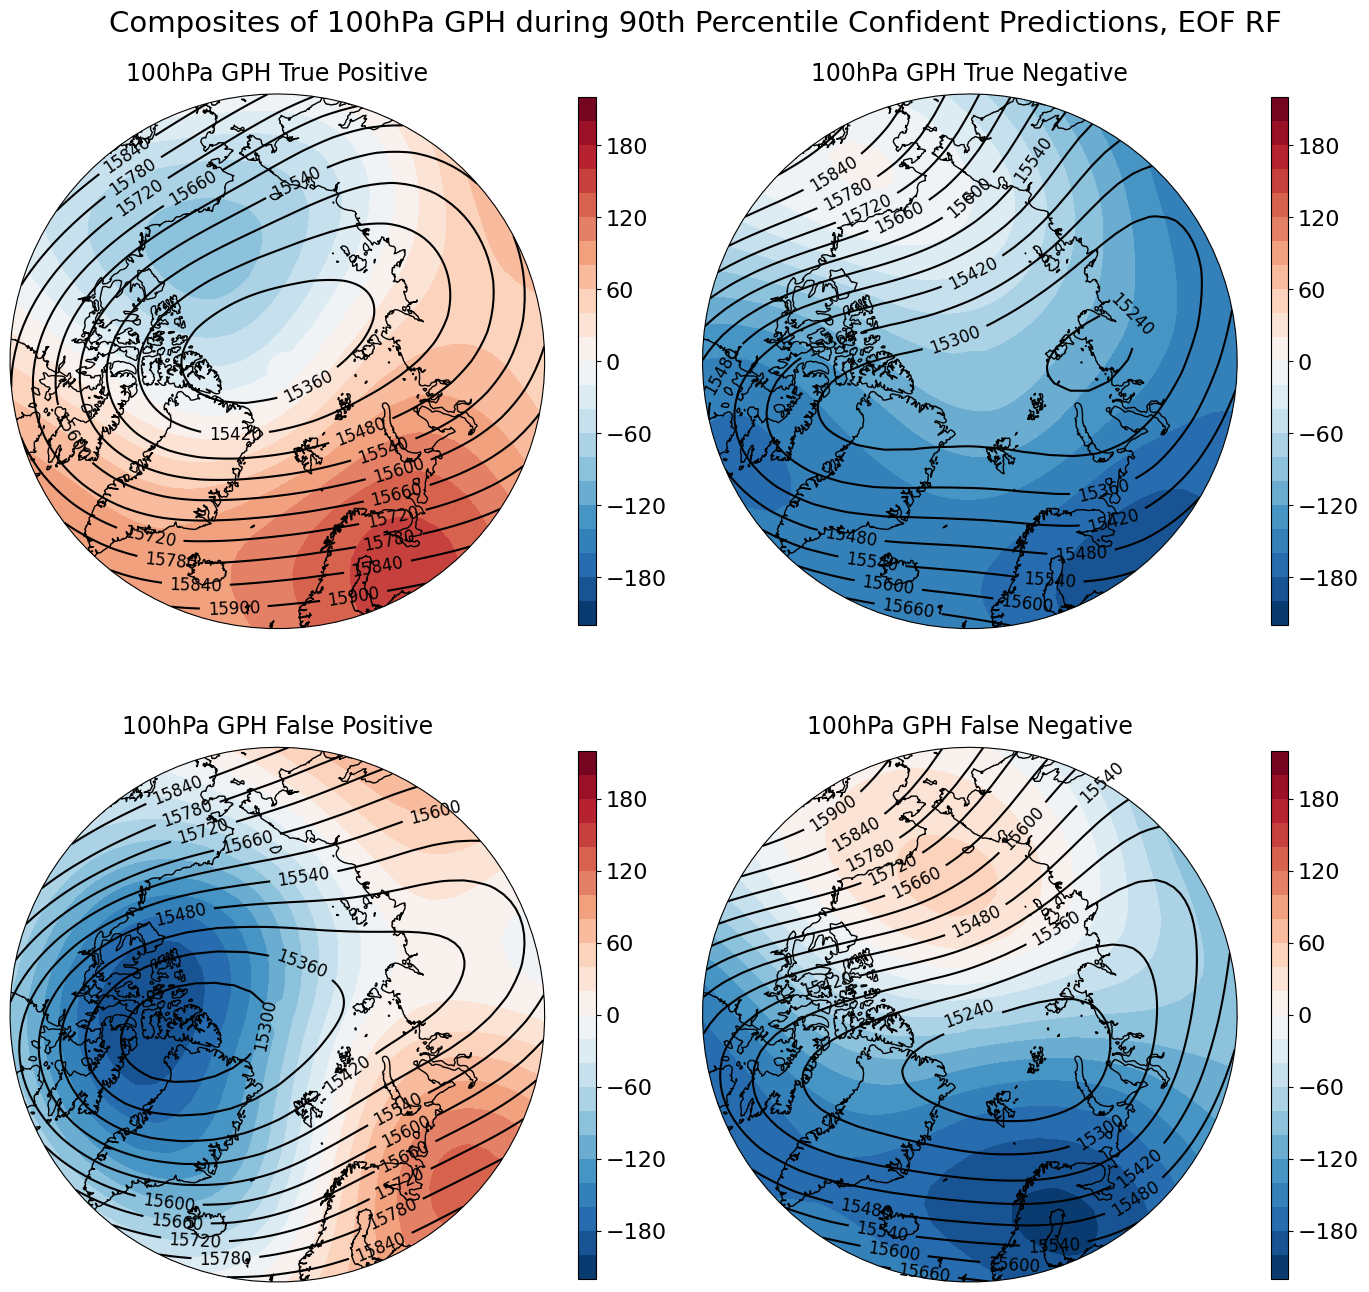

In [11]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from geopy.distance import great_circle
import cartopy.crs as ccrs
from matplotlib.path import Path

fs = 18
fig, axes = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': ccrs.NorthPolarStereo()})
plt.suptitle("Composites of 100hPa GPH during 90th Percentile Confident Predictions, EOF RF", fontsize=21)   

titles = ["True Positive", "True Negative", "False Positive", "False Negative"]
data1 = [
    np.nanmean(GPH_cpos, axis=0),
    np.nanmean(GPH_cneg, axis=0),
    np.nanmean(GPH_Fpos, axis=0),
    np.nanmean(GPH_Fneg, axis=0)
]

data2 = [
    np.nanmean(GPHA_cpos, axis=0),
    np.nanmean(GPHA_cneg, axis=0),
    np.nanmean(GPHA_Fpos, axis=0),
    np.nanmean(GPHA_Fneg, axis=0)
]

axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    ax.set_title("100hPa GPH " + str(titles[i]), fontsize=fs-1, y=1.01, x=0.5)
    ax.coastlines()

    theta = np.linspace(0, 2 * np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)
    ax.set_boundary(circle, transform=ax.transAxes)

    colorbarMin, colorbarMax, colorspace = -220, 220, 20
    level = np.arange(colorbarMin, colorbarMax + colorspace, colorspace)

    h = ax.contourf(lon, lat[:16], data2[i], level, transform=ccrs.PlateCarree(), cmap="RdBu_r")
    
    level_cont = np.arange(15000, 16000, 60)
    g_cont = ax.contour(lon,lat[:16],data1[i], level_cont, transform=ccrs.PlateCarree(), colors = 'k')
    labels = ax.clabel(g_cont, inline = True, fontsize = 12) 

    # Colorbar
    cbar = fig.colorbar(h, ax=ax, orientation="vertical", shrink=0.75, pad=0.05, aspect=30)
    cbar.ax.tick_params(labelsize=fs - 2)

plt.tight_layout()
plt.subplots_adjust(top=0.98)
plt.savefig("EOFRF_GPH100Comp.png",bbox_inches = 'tight')
plt.show()